<a href="https://colab.research.google.com/github/jeonggunlee/SleepCapstone/blob/master/Codes/01_SleepDataPreparation_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한림대학교 소프트웨어 융합대학
빅데이터 캡스톤 프로젝트

딥러닝에 기반한 수면 분류 모델 개발

In [ ]:
# GPU 가용성 체크
!nvidia-smi

Fri Oct  9 15:48:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 공공데이터 download 쉘 가져오기
!git clone https://github.com/jeonggunlee/SleepCapstone

Cloning into 'SleepCapstone'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 194 (delta 13), reused 0 (delta 0), pack-reused 162
Receiving objects: 100% (194/194), 6.12 MiB | 35.38 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
cp ./SleepCapstone/Codes/download_physionet.sh .

In [ ]:
!chmod 777 download_physionet.sh

In [ ]:
!./download_physionet.sh

--2020-10-09 15:48:34--  https://www.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4001E0-PSG.edf
Resolving www.physionet.org (www.physionet.org)... 18.18.42.54
Connecting to www.physionet.org (www.physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48338048 (46M) [application/octet-stream]
Saving to: ‘SC4001E0-PSG.edf’

SC4001E0-PSG.edf    100%[===================>]  46.10M  27.2MB/s    in 1.7s    

2020-10-09 15:48:36 (27.2 MB/s) - ‘SC4001E0-PSG.edf’ saved [48338048/48338048]

--2020-10-09 15:48:36--  https://www.physionet.org/physiobank/database/sleep-edfx/sleep-cassette/SC4001E0-PSG.edf.hyp
Resolving www.physionet.org (www.physionet.org)... 18.18.42.54
Connecting to www.physionet.org (www.physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-10-09 15:48:37 ERROR 404: Not Found.

--2020-10-09 15:48:37--  https://www.physionet.org/physiobank/database/sleep-edfx/sleep-ca

In [ ]:
ls -al

total 1913136
drwxr-xr-x 1 root root     4096 Oct  9 15:51 ./
drwxr-xr-x 1 root root     4096 Oct  9 15:47 ../
drwxr-xr-x 1 root root     4096 Oct  5 16:31 .config/
-rwxrwxrwx 1 root root    11388 Oct  9 15:48 download_physionet.sh*
drwxr-xr-x 1 root root     4096 Oct  5 16:31 sample_data/
-rw-r--r-- 1 root root 48338048 Apr  5  2018 SC4001E0-PSG.edf
-rw-r--r-- 1 root root     4620 Apr  5  2018 SC4001EC-Hypnogram.edf
-rw-r--r-- 1 root root 51621248 Apr  5  2018 SC4002E0-PSG.edf
-rw-r--r-- 1 root root     4580 Apr  5  2018 SC4002EC-Hypnogram.edf
-rw-r--r-- 1 root root 51110528 Apr  5  2018 SC4011E0-PSG.edf
-rw-r--r-- 1 root root     3896 Apr  5  2018 SC4011EH-Hypnogram.edf
-rw-r--r-- 1 root root 51986048 Apr  5  2018 SC4012E0-PSG.edf
-rw-r--r-- 1 root root     5082 Apr  5  2018 SC4012EC-Hypnogram.edf
-rw-r--r-- 1 root root 51147008 Apr  5  2018 SC4021E0-PSG.edf
-rw-r--r-- 1 root root     4804 Apr  5  2018 SC4021EH-Hypnogram.edf
-rw-r--r-- 1 root root 50271488 Apr  5  2018 SC4022E0-PSG.e

In [ ]:
mkdir signals

In [ ]:
mkdir annotations

In [ ]:
mv *Hypnogram.edf ./annotations

In [ ]:
mv *PSG.edf ./signals

In [ ]:
ls signals/

SC4001E0-PSG.edf  SC4051E0-PSG.edf  SC4101E0-PSG.edf  SC4152E0-PSG.edf
SC4002E0-PSG.edf  SC4052E0-PSG.edf  SC4102E0-PSG.edf  SC4161E0-PSG.edf
SC4011E0-PSG.edf  SC4061E0-PSG.edf  SC4111E0-PSG.edf  SC4162E0-PSG.edf
SC4012E0-PSG.edf  SC4062E0-PSG.edf  SC4112E0-PSG.edf  SC4171E0-PSG.edf
SC4021E0-PSG.edf  SC4071E0-PSG.edf  SC4121E0-PSG.edf  SC4172E0-PSG.edf
SC4022E0-PSG.edf  SC4072E0-PSG.edf  SC4122E0-PSG.edf  SC4181E0-PSG.edf
SC4031E0-PSG.edf  SC4081E0-PSG.edf  SC4131E0-PSG.edf  SC4182E0-PSG.edf
SC4032E0-PSG.edf  SC4082E0-PSG.edf  SC4141E0-PSG.edf  SC4191E0-PSG.edf
SC4041E0-PSG.edf  SC4091E0-PSG.edf  SC4142E0-PSG.edf  SC4192E0-PSG.edf
SC4042E0-PSG.edf  SC4092E0-PSG.edf  SC4151E0-PSG.edf


In [ ]:
ls annotations

SC4001EC-Hypnogram.edf  SC4062EC-Hypnogram.edf  SC4131EC-Hypnogram.edf
SC4002EC-Hypnogram.edf  SC4071EC-Hypnogram.edf  SC4141EU-Hypnogram.edf
SC4011EH-Hypnogram.edf  SC4072EH-Hypnogram.edf  SC4142EU-Hypnogram.edf
SC4012EC-Hypnogram.edf  SC4081EC-Hypnogram.edf  SC4151EC-Hypnogram.edf
SC4021EH-Hypnogram.edf  SC4082EP-Hypnogram.edf  SC4152EC-Hypnogram.edf
SC4022EJ-Hypnogram.edf  SC4091EC-Hypnogram.edf  SC4161EC-Hypnogram.edf
SC4031EC-Hypnogram.edf  SC4092EC-Hypnogram.edf  SC4162EC-Hypnogram.edf
SC4032EP-Hypnogram.edf  SC4101EC-Hypnogram.edf  SC4171EU-Hypnogram.edf
SC4041EC-Hypnogram.edf  SC4102EC-Hypnogram.edf  SC4172EC-Hypnogram.edf
SC4042EC-Hypnogram.edf  SC4111EC-Hypnogram.edf  SC4181EC-Hypnogram.edf
SC4051EC-Hypnogram.edf  SC4112EC-Hypnogram.edf  SC4182EC-Hypnogram.edf
SC4052EC-Hypnogram.edf  SC4121EC-Hypnogram.edf  SC4191EP-Hypnogram.edf
SC4061EC-Hypnogram.edf  SC4122EV-Hypnogram.edf  SC4192EV-Hypnogram.edf


In [ ]:
!pip install pyedflib

     |████████████████████████████████| 1.1MB 3.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyedflib: filename=pyEDFlib-0.1.18-cp36-cp36m-linux_x86_64.whl size=920470 sha256=3ceb78b69b05e487a8c0cf58caa272741dced83f3d6715b92505e0a92ad8c048
  Stored in directory: /root/.cache/pip/wheels/4c/16/32/829749d6ab56f64e81e44aed0b4b9a892c975512c15cc3edbb
Successfully built pyedflib


In [ ]:
import numpy as np
from pyedflib import highlevel
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import shutil

In [ ]:
def search_annotations_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("Hypnogram.edf")]
    return filenames

def search_signals_edf(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith("PSG.edf")]
    return filenames

def search_correct_annotations(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("Hypnogram.edf")]
    
    return filename

def search_signals_npy(dirname):
    filenames = os.listdir(dirname)
    filenames = [file for file in filenames if file.endswith(".npy")]
    return filenames

def search_correct_annotations_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

def search_correct_signals_npy(dirname,filename):
    search_filename = filename.split('-')[0][:-2]
    file_list = os.listdir(dirname)
    filename = [file for file in file_list if search_filename in file if file.endswith("npy")]
    
    return filename

In [ ]:
signals_path = 'signals/'
annotations_path = 'annotations/'
annotations_edf_list = search_annotations_edf(annotations_path)
signals_edf_list = search_signals_edf(signals_path)

print('signals edf file list')
print(signals_edf_list)

print('annotations edf file list')
print(annotations_edf_list)

signals edf file list
['SC4151E0-PSG.edf', 'SC4051E0-PSG.edf', 'SC4052E0-PSG.edf', 'SC4042E0-PSG.edf', 'SC4122E0-PSG.edf', 'SC4092E0-PSG.edf', 'SC4111E0-PSG.edf', 'SC4081E0-PSG.edf', 'SC4061E0-PSG.edf', 'SC4102E0-PSG.edf', 'SC4171E0-PSG.edf', 'SC4121E0-PSG.edf', 'SC4011E0-PSG.edf', 'SC4021E0-PSG.edf', 'SC4082E0-PSG.edf', 'SC4072E0-PSG.edf', 'SC4101E0-PSG.edf', 'SC4152E0-PSG.edf', 'SC4062E0-PSG.edf', 'SC4022E0-PSG.edf', 'SC4172E0-PSG.edf', 'SC4041E0-PSG.edf', 'SC4182E0-PSG.edf', 'SC4181E0-PSG.edf', 'SC4161E0-PSG.edf', 'SC4032E0-PSG.edf', 'SC4141E0-PSG.edf', 'SC4071E0-PSG.edf', 'SC4012E0-PSG.edf', 'SC4131E0-PSG.edf', 'SC4091E0-PSG.edf', 'SC4112E0-PSG.edf', 'SC4162E0-PSG.edf', 'SC4001E0-PSG.edf', 'SC4192E0-PSG.edf', 'SC4142E0-PSG.edf', 'SC4002E0-PSG.edf', 'SC4031E0-PSG.edf', 'SC4191E0-PSG.edf']
annotations edf file list
['SC4182EC-Hypnogram.edf', 'SC4062EC-Hypnogram.edf', 'SC4032EP-Hypnogram.edf', 'SC4161EC-Hypnogram.edf', 'SC4082EP-Hypnogram.edf', 'SC4181EC-Hypnogram.edf', 'SC4012EC-Hypn

In [ ]:
epoch_size = 30
sample_rate = 100
save_signals_path = signals_path + 'npy/'
save_annotations_path = annotations_path+'npy/'

os.makedirs(save_annotations_path,exist_ok=True)
os.makedirs(save_signals_path,exist_ok=True)

for filename in signals_edf_list:
    signals_filename = filename
    annotations_filename = search_correct_annotations(annotations_path,filename)[0]
    
    print(signals_filename,annotations_filename)


    signals_filename = signals_path + signals_filename
    annotations_filename = annotations_path + annotations_filename
    
    _, _, annotations_header = highlevel.read_edf(annotations_filename)
    print(annotations_header)
    label = []
    for ann in annotations_header['annotations']:
        start = ann[0]

        length = ann[1]
        length = int(str(length)[2:-1]) // epoch_size # label은 30초 간격으로 사용할 것이기 때문에 30으로 나눈 값이 해당 sleep stage가 반복된 횟수이다.
        
        if ann[2] == 'Sleep stage W':
            for time in range(length):
                label.append(0)
        elif ann[2] == 'Sleep stage 1':
            for time in range(length):
                label.append(1)
        elif ann[2] == 'Sleep stage 2':
            for time in range(length):
                label.append(2)
        elif ann[2] == 'Sleep stage 3':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage 4':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage R':
            for time in range(length):
                label.append(4)
        else:
            for time in range(length):
                label.append(5)
    label = np.array(label)


    signals, _, signals_header = highlevel.read_edf(signals_filename)
    
    
    signals_len = len(signals[0]) // sample_rate // epoch_size
    annotations_len = len(label)
    if signals_header['startdate'] == annotations_header['startdate']:
        print("%s file's signal & annotations start time is same"%signals_filename.split('/')[-1])
        
        if signals_len > annotations_len :
            signals = signals[:3][:annotations_len]
        elif signals_len < annotations_len :
            signals = signals[:3]
            label = label[:signals_len]
        else:
            signals = signals[:3]
        signals = np.array(signals)
        
        np.save(save_signals_path + signals_filename.split('/')[-1].split('.')[0],signals)
        np.save(save_annotations_path + annotations_filename.split('/')[-1].split('.')[0],label)
        
        if (len(signals[0])//sample_rate//epoch_size != len(label)):
            print('signals len : %d / annotations len : %d'%(len(signals[0])//sample_rate//epoch_size,len(label)))
        
    else:
        print("%s file''s signal & annotations start time is different"%signals_filename.split('/')[-1])

Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4151E0-PSG.edf SC4151EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 6, 21, 16, 40), 'birthdate': '', 'annotations': [[0.0, b'26820', 'Sleep stage W'], [26820.0, b'30', 'Sleep stage 1'], [26850.0, b'30', 'Sleep stage W'], [26880.0, b'120', 'Sleep stage 1'], [27000.0, b'60', 'Sleep stage 2'], [27060.0, b'90', 'Sleep stage 1'], [27150.0, b'330', 'Sleep stage 2'], [27480.0, b'30', 'Movement time'], [27510.0, b'240', 'Sleep stage W'], [27750.0, b'90', 'Sleep stage 1'], [27840.0, b'1200', 'Sleep stage 2'], [29040.0, b'510', 'Sleep stage 3'], [29550.0, b'240', 'Sleep stage 2'], [29790.0, b'30', 'Sleep stage 3'], [29820.0, b'60', 'Sleep stage 2'], [29880.0, b'90', 'Sleep stage 3'], [29970.0, b'30', 'Sleep stage 2'], [30000.0, b'720', 'Sleep stage R'], [30720.0, b'30', 'Movement time'], [30750.0, b'1320', 'Sleep stag

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]


SC4151E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4051E0-PSG.edf SC4051EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 26, 16, 25), 'birthdate': '', 'annotations': [[0.0, b'38670', 'Sleep stage W'], [38670.0, b'180', 'Sleep stage 1'], [38850.0, b'900', 'Sleep stage 2'], [39750.0, b'30', 'Sleep stage 3'], [39780.0, b'30', 'Sleep stage 2'], [39810.0, b'60', 'Sleep stage 3'], [39870.0, b'60', 'Sleep stage 2'], [39930.0, b'30', 'Sleep stage 3'], [39960.0, b'30', 'Sleep stage 2'], [39990.0, b'30', 'Sleep stage 3'], [40020.0, b'90', 'Sleep stage 2'], [40110.0, b'150', 'Sleep stage 3'], [40260.0, b'30', 'Sleep stage 2'], [40290.0, b'60', 'Sleep stage 3'], [40350.0, b'30', 'Sleep stage 2'], [40380.0, b'30', 'Sleep stage 3'], [40410.0, b'30', 'Sleep stage 2'], [40440.0, b'60', 'Sleep stage 3'], [40500.0, b'30', 'Sleep stage 2'], [40530.0, b'90', 'Sleep stage 3

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]


SC4051E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4052E0-PSG.edf SC4052EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 27, 15, 42), 'birthdate': '', 'annotations': [[0.0, b'32430', 'Sleep stage W'], [32430.0, b'300', 'Sleep stage 1'], [32730.0, b'570', 'Sleep stage 2'], [33300.0, b'30', 'Sleep stage W'], [33330.0, b'30', 'Sleep stage 1'], [33360.0, b'90', 'Sleep stage W'], [33450.0, b'60', 'Sleep stage 1'], [33510.0, b'510', 'Sleep stage 2'], [34020.0, b'30', 'Sleep stage 3'], [34050.0, b'210', 'Sleep stage 2'], [34260.0, b'30', 'Sleep stage 3'], [34290.0, b'390', 'Sleep stage 2'], [34680.0, b'60', 'Sleep stage 3'], [34740.0, b'60', 'Sleep stage 2'], [34800.0, b'240', 'Sleep stage 3'], [35040.0, b'60', 'Sleep stage 4'], [35100.0, b'510', 'Sleep stage 3'], [35610.0, b'30', 'Movement time'], [35640.0, b'390', 'Sleep stage 2'], [36030.0, b'840', 'Sleep s

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]


SC4052E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4042E0-PSG.edf SC4042EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 34yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 25, 15, 4), 'birthdate': '', 'annotations': [[0.0, b'32220', 'Sleep stage W'], [32220.0, b'150', 'Sleep stage 1'], [32370.0, b'210', 'Sleep stage W'], [32580.0, b'30', 'Sleep stage 1'], [32610.0, b'60', 'Sleep stage W'], [32670.0, b'600', 'Sleep stage 1'], [33270.0, b'270', 'Sleep stage 2'], [33540.0, b'30', 'Sleep stage 1'], [33570.0, b'60', 'Sleep stage 2'], [33630.0, b'210', 'Sleep stage W'], [33840.0, b'30', 'Sleep stage 1'], [33870.0, b'180', 'Sleep stage W'], [34050.0, b'60', 'Sleep stage 1'], [34110.0, b'150', 'Sleep stage W'], [34260.0, b'60', 'Sleep stage 1'], [34320.0, b'630', 'Sleep stage W'], [34950.0, b'540', 'Sleep stage 1'], [35490.0, b'1200', 'Sleep stage 2'], [36690.0, b'30', 'Sleep stage 3'], [36720.0, b'30', 'Sleep 

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]


SC4042E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4122E0-PSG.edf SC4122EV-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 5, 23, 16, 2), 'birthdate': '', 'annotations': [[0.0, b'33420', 'Sleep stage W'], [33420.0, b'330', 'Sleep stage 1'], [33750.0, b'990', 'Sleep stage 2'], [34740.0, b'90', 'Sleep stage W'], [34830.0, b'180', 'Sleep stage 1'], [35010.0, b'390', 'Sleep stage R'], [35400.0, b'390', 'Sleep stage 2'], [35790.0, b'60', 'Sleep stage W'], [35850.0, b'240', 'Sleep stage 1'], [36090.0, b'540', 'Sleep stage 2'], [36630.0, b'2520', 'Sleep stage W'], [39150.0, b'30', 'Sleep stage 1'], [39180.0, b'1410', 'Sleep stage W'], [40590.0, b'150', 'Sleep stage 1'], [40740.0, b'30', 'Sleep stage W'], [40770.0, b'30', 'Sleep stage 1'], [40800.0, b'30', 'Sleep stage W'], [40830.0, b'180', 'Sleep stage 1'], [41010.0, b'30', 'Sleep stage W'], [41040.0, b'210', 'Sleep s

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]


SC4122E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4092E0-PSG.edf SC4092EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 25yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 6, 6, 15, 33), 'birthdate': '', 'annotations': [[0.0, b'26910', 'Sleep stage W'], [26910.0, b'540', 'Sleep stage 1'], [27450.0, b'1080', 'Sleep stage 2'], [28530.0, b'240', 'Sleep stage 3'], [28770.0, b'60', 'Sleep stage 1'], [28830.0, b'300', 'Sleep stage 2'], [29130.0, b'30', 'Sleep stage 1'], [29160.0, b'330', 'Sleep stage 2'], [29490.0, b'90', 'Sleep stage 3'], [29580.0, b'90', 'Sleep stage 2'], [29670.0, b'30', 'Sleep stage 3'], [29700.0, b'750', 'Sleep stage 2'], [30450.0, b'720', 'Sleep stage R'], [31170.0, b'30', 'Movement time'], [31200.0, b'540', 'Sleep stage R'], [31740.0, b'30', 'Movement time'], [31770.0, b'120', 'Sleep stage 1'], [31890.0, b'1050', 'Sleep stage 2'], [32940.0, b'300', 'Sleep stage 3'], [33240.0, b'30', 'Slee

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


SC4092E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4111E0-PSG.edf SC4111EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 5, 1, 16, 29), 'birthdate': '', 'annotations': [[0.0, b'28050', 'Sleep stage W'], [28050.0, b'60', 'Sleep stage 1'], [28110.0, b'60', 'Sleep stage W'], [28170.0, b'180', 'Sleep stage 1'], [28350.0, b'570', 'Sleep stage 2'], [28920.0, b'60', 'Sleep stage W'], [28980.0, b'30', 'Sleep stage 1'], [29010.0, b'30', 'Sleep stage W'], [29040.0, b'60', 'Sleep stage 1'], [29100.0, b'720', 'Sleep stage 2'], [29820.0, b'30', 'Sleep stage 3'], [29850.0, b'60', 'Sleep stage 2'], [29910.0, b'30', 'Sleep stage 3'], [29940.0, b'60', 'Sleep stage 2'], [30000.0, b'30', 'Sleep stage 3'], [30030.0, b'30', 'Sleep stage 2'], [30060.0, b'30', 'Sleep stage 3'], [30090.0, b'90', 'Sleep stage 2'], [30180.0, b'30', 'Sleep stage 3'], [30210.0, b'60', 'Sleep stage 2'], [

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.94it/s]


SC4111E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4081E0-PSG.edf SC4081EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 25yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 5, 24, 16, 37), 'birthdate': '', 'annotations': [[0.0, b'24090', 'Sleep stage W'], [24090.0, b'180', 'Sleep stage 1'], [24270.0, b'120', 'Sleep stage W'], [24390.0, b'210', 'Sleep stage 1'], [24600.0, b'240', 'Sleep stage W'], [24840.0, b'90', 'Sleep stage 1'], [24930.0, b'90', 'Sleep stage W'], [25020.0, b'30', 'Sleep stage 1'], [25050.0, b'5040', 'Sleep stage W'], [30090.0, b'840', 'Sleep stage 1'], [30930.0, b'480', 'Sleep stage 2'], [31410.0, b'180', 'Sleep stage 3'], [31590.0, b'1410', 'Sleep stage 4'], [33000.0, b'120', 'Sleep stage 3'], [33120.0, b'30', 'Sleep stage 2'], [33150.0, b'210', 'Sleep stage 3'], [33360.0, b'30', 'Sleep stage 2'], [33390.0, b'270', 'Sleep stage 3'], [33660.0, b'1200', 'Sleep stage 4'], [34860.0, b'60', '

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


SC4081E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4061E0-PSG.edf SC4061EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 5, 8, 16, 35), 'birthdate': '', 'annotations': [[0.0, b'28050', 'Sleep stage W'], [28050.0, b'180', 'Sleep stage 1'], [28230.0, b'120', 'Sleep stage 2'], [28350.0, b'30', 'Sleep stage 1'], [28380.0, b'1320', 'Sleep stage 2'], [29700.0, b'60', 'Sleep stage W'], [29760.0, b'210', 'Sleep stage 1'], [29970.0, b'120', 'Sleep stage 2'], [30090.0, b'30', 'Sleep stage W'], [30120.0, b'90', 'Sleep stage 1'], [30210.0, b'60', 'Sleep stage W'], [30270.0, b'180', 'Sleep stage 1'], [30450.0, b'240', 'Sleep stage 2'], [30690.0, b'30', 'Sleep stage 1'], [30720.0, b'570', 'Sleep stage 2'], [31290.0, b'30', 'Sleep stage 3'], [31320.0, b'90', 'Sleep stage 2'], [31410.0, b'120', 'Sleep stage 3'], [31530.0, b'390', 'Sleep stage 4'], [31920.0, b'30', 'Sleep 

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]


SC4061E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4102E0-PSG.edf SC4102EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 4, 18, 15, 56), 'birthdate': '', 'annotations': [[0.0, b'26400', 'Sleep stage W'], [26400.0, b'960', 'Sleep stage 1'], [27360.0, b'1410', 'Sleep stage 2'], [28770.0, b'30', 'Sleep stage 3'], [28800.0, b'30', 'Sleep stage 2'], [28830.0, b'150', 'Sleep stage 3'], [28980.0, b'120', 'Sleep stage 2'], [29100.0, b'30', 'Sleep stage 1'], [29130.0, b'540', 'Sleep stage 2'], [29670.0, b'30', 'Sleep stage 3'], [29700.0, b'30', 'Sleep stage 2'], [29730.0, b'30', 'Sleep stage 3'], [29760.0, b'360', 'Sleep stage 2'], [30120.0, b'2130', 'Sleep stage R'], [32250.0, b'1260', 'Sleep stage 2'], [33510.0, b'60', 'Sleep stage W'], [33570.0, b'60', 'Sleep stage 1'], [33630.0, b'60', 'Sleep stage 2'], [33690.0, b'30', 'Sleep stage 1'], [33720.0, b'930', 'Sleep st

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


SC4102E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4171E0-PSG.edf SC4171EU-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 12, 16, 9), 'birthdate': '', 'annotations': [[0.0, b'29010', 'Sleep stage W'], [29010.0, b'30', 'Sleep stage 1'], [29040.0, b'30', 'Sleep stage W'], [29070.0, b'90', 'Sleep stage 1'], [29160.0, b'570', 'Sleep stage 2'], [29730.0, b'90', 'Sleep stage 3'], [29820.0, b'30', 'Sleep stage 2'], [29850.0, b'150', 'Sleep stage 3'], [30000.0, b'30', 'Sleep stage 2'], [30030.0, b'120', 'Sleep stage 3'], [30150.0, b'30', 'Sleep stage 2'], [30180.0, b'30', 'Sleep stage 3'], [30210.0, b'60', 'Sleep stage 4'], [30270.0, b'90', 'Sleep stage 3'], [30360.0, b'30', 'Sleep stage 4'], [30390.0, b'30', 'Sleep stage 3'], [30420.0, b'60', 'Sleep stage 4'], [30480.0, b'120', 'Sleep stage 3'], [30600.0, b'30', 'Sleep stage 4'], [30630.0, b'30', 'Sleep stage 3'], 

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]


SC4171E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4121E0-PSG.edf SC4121EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 5, 22, 16, 2), 'birthdate': '', 'annotations': [[0.0, b'28860', 'Sleep stage W'], [28860.0, b'90', 'Sleep stage 1'], [28950.0, b'450', 'Sleep stage 2'], [29400.0, b'30', 'Sleep stage 1'], [29430.0, b'720', 'Sleep stage 2'], [30150.0, b'180', 'Sleep stage 3'], [30330.0, b'360', 'Sleep stage 4'], [30690.0, b'30', 'Sleep stage 3'], [30720.0, b'30', 'Sleep stage 4'], [30750.0, b'60', 'Sleep stage 3'], [30810.0, b'420', 'Sleep stage 4'], [31230.0, b'60', 'Sleep stage 3'], [31290.0, b'1290', 'Sleep stage 2'], [32580.0, b'810', 'Sleep stage R'], [33390.0, b'30', 'Sleep stage 1'], [33420.0, b'30', 'Sleep stage 2'], [33450.0, b'30', 'Sleep stage 1'], [33480.0, b'1140', 'Sleep stage 2'], [34620.0, b'90', 'Sleep stage 3'], [34710.0, b'30', 'Sleep stage

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]


SC4121E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4011E0-PSG.edf SC4011EH-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 33yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 3, 29, 16, 49), 'birthdate': '', 'annotations': [[0.0, b'21540', 'Sleep stage W'], [21540.0, b'360', 'Sleep stage 1'], [21900.0, b'60', 'Sleep stage 2'], [21960.0, b'60', 'Sleep stage 1'], [22020.0, b'180', 'Sleep stage 2'], [22200.0, b'510', 'Sleep stage 1'], [22710.0, b'30', 'Sleep stage W'], [22740.0, b'150', 'Sleep stage 1'], [22890.0, b'180', 'Sleep stage 2'], [23070.0, b'210', 'Sleep stage 1'], [23280.0, b'60', 'Sleep stage W'], [23340.0, b'180', 'Sleep stage 1'], [23520.0, b'360', 'Sleep stage 2'], [23880.0, b'30', 'Sleep stage 3'], [23910.0, b'120', 'Sleep stage 2'], [24030.0, b'690', 'Sleep stage 3'], [24720.0, b'30', 'Sleep stage 2'], [24750.0, b'360', 'Sleep stage 3'], [25110.0, b'30', 'Sleep stage 4'], [25140.0, b'120', 'Slee

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]


SC4011E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4021E0-PSG.edf SC4021EH-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 5, 16, 48), 'birthdate': '', 'annotations': [[0.0, b'21870', 'Sleep stage W'], [21870.0, b'780', 'Sleep stage 1'], [22650.0, b'30', 'Sleep stage W'], [22680.0, b'450', 'Sleep stage 1'], [23130.0, b'930', 'Sleep stage 2'], [24060.0, b'30', 'Sleep stage W'], [24090.0, b'450', 'Sleep stage 2'], [24540.0, b'60', 'Sleep stage 3'], [24600.0, b'60', 'Sleep stage 2'], [24660.0, b'30', 'Sleep stage 3'], [24690.0, b'30', 'Sleep stage 4'], [24720.0, b'30', 'Sleep stage 3'], [24750.0, b'30', 'Sleep stage 2'], [24780.0, b'90', 'Sleep stage 3'], [24870.0, b'30', 'Sleep stage 2'], [24900.0, b'60', 'Sleep stage 3'], [24960.0, b'30', 'Sleep stage 2'], [24990.0, b'30', 'Sleep stage 3'], [25020.0, b'90', 'Sleep stage 4'], [25110.0, b'60', 'Sleep stage 3

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


SC4021E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4082E0-PSG.edf SC4082EP-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 25yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 5, 25, 16, 43), 'birthdate': '', 'annotations': [[0.0, b'25350', 'Sleep stage W'], [25350.0, b'30', 'Sleep stage 1'], [25380.0, b'120', 'Sleep stage W'], [25500.0, b'90', 'Sleep stage 1'], [25590.0, b'60', 'Sleep stage 2'], [25650.0, b'30', 'Sleep stage 1'], [25680.0, b'30', 'Sleep stage 2'], [25710.0, b'30', 'Sleep stage 1'], [25740.0, b'30', 'Sleep stage W'], [25770.0, b'30', 'Sleep stage 1'], [25800.0, b'120', 'Sleep stage 2'], [25920.0, b'60', 'Sleep stage 1'], [25980.0, b'30', 'Sleep stage 2'], [26010.0, b'30', 'Sleep stage 1'], [26040.0, b'30', 'Sleep stage 2'], [26070.0, b'30', 'Sleep stage 1'], [26100.0, b'270', 'Sleep stage 2'], [26370.0, b'30', 'Sleep stage 3'], [26400.0, b'30', 'Sleep stage 2'], [26430.0, b'30', 'Sleep stage 3

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


SC4082E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4072E0-PSG.edf SC4072EH-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 30yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 2, 18, 17, 5), 'birthdate': '', 'annotations': [[0.0, b'19200', 'Sleep stage W'], [19200.0, b'30', 'Sleep stage 1'], [19230.0, b'390', 'Sleep stage W'], [19620.0, b'30', 'Sleep stage 1'], [19650.0, b'8040', 'Sleep stage W'], [27690.0, b'270', 'Sleep stage 1'], [27960.0, b'60', 'Sleep stage W'], [28020.0, b'240', 'Sleep stage 1'], [28260.0, b'480', 'Sleep stage 2'], [28740.0, b'90', 'Sleep stage 1'], [28830.0, b'180', 'Sleep stage 2'], [29010.0, b'30', 'Sleep stage 3'], [29040.0, b'60', 'Sleep stage 2'], [29100.0, b'30', 'Sleep stage 3'], [29130.0, b'30', 'Sleep stage 2'], [29160.0, b'30', 'Sleep stage 3'], [29190.0, b'60', 'Sleep stage 4'], [29250.0, b'90', 'Sleep stage 3'], [29340.0, b'1380', 'Sleep stage 4'], [30720.0, b'30', 'Sleep st

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]


SC4072E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4101E0-PSG.edf SC4101EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 4, 17, 16, 50), 'birthdate': '', 'annotations': [[0.0, b'22860', 'Sleep stage W'], [22860.0, b'450', 'Sleep stage 1'], [23310.0, b'900', 'Sleep stage 2'], [24210.0, b'30', 'Sleep stage 3'], [24240.0, b'150', 'Sleep stage 2'], [24390.0, b'30', 'Sleep stage 3'], [24420.0, b'60', 'Sleep stage W'], [24480.0, b'30', 'Sleep stage 1'], [24510.0, b'600', 'Sleep stage 2'], [25110.0, b'120', 'Sleep stage W'], [25230.0, b'150', 'Sleep stage 1'], [25380.0, b'1230', 'Sleep stage 2'], [26610.0, b'60', 'Sleep stage W'], [26670.0, b'120', 'Sleep stage 1'], [26790.0, b'1080', 'Sleep stage 2'], [27870.0, b'1710', 'Sleep stage R'], [29580.0, b'1170', 'Sleep stage 2'], [30750.0, b'30', 'Sleep stage 3'], [30780.0, b'90', 'Sleep stage 2'], [30870.0, b'30', 'Sleep

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]


SC4101E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4152E0-PSG.edf SC4152EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 6, 22, 14, 53), 'birthdate': '', 'annotations': [[0.0, b'10350', 'Sleep stage W'], [10350.0, b'60', 'Sleep stage 1'], [10410.0, b'390', 'Sleep stage 2'], [10800.0, b'180', 'Sleep stage R'], [10980.0, b'150', 'Sleep stage 1'], [11130.0, b'930', 'Sleep stage 2'], [12060.0, b'19740', 'Sleep stage W'], [31800.0, b'240', 'Sleep stage 1'], [32040.0, b'870', 'Sleep stage 2'], [32910.0, b'30', 'Sleep stage 3'], [32940.0, b'120', 'Sleep stage 2'], [33060.0, b'30', 'Sleep stage 3'], [33090.0, b'30', 'Sleep stage 2'], [33120.0, b'120', 'Sleep stage 3'], [33240.0, b'30', 'Sleep stage 2'], [33270.0, b'90', 'Sleep stage 3'], [33360.0, b'30', 'Sleep stage 2'], [33390.0, b'90', 'Sleep stage 3'], [33480.0, b'210', 'Sleep stage 4'], [33690.0, b'300', 'Sleep s

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]


SC4152E0-PSG.edf file's signal & annotations start time is same
SC4062E0-PSG.edf SC4062EC-Hypnogram.edf


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

{'technician': '', 'recording_additional': '', 'patientname': 'Female 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 5, 9, 15, 55), 'birthdate': '', 'annotations': [[0.0, b'25410', 'Sleep stage W'], [25410.0, b'30', 'Sleep stage 1'], [25440.0, b'390', 'Sleep stage W'], [25830.0, b'240', 'Sleep stage 1'], [26070.0, b'690', 'Sleep stage 2'], [26760.0, b'90', 'Sleep stage W'], [26850.0, b'180', 'Sleep stage 1'], [27030.0, b'660', 'Sleep stage 2'], [27690.0, b'390', 'Sleep stage 3'], [28080.0, b'30', 'Sleep stage 4'], [28110.0, b'180', 'Sleep stage 3'], [28290.0, b'30', 'Sleep stage 4'], [28320.0, b'270', 'Sleep stage 3'], [28590.0, b'60', 'Sleep stage 4'], [28650.0, b'30', 'Sleep stage 3'], [28680.0, b'150', 'Sleep stage 4'], [28830.0, b'60', 'Sleep stage 3'], [28890.0, b'30', 'Sleep stage 4'], [28920.0, b'30', 'Sleep stage 3'], [28950.0, b'330', 'Sleep stage 4'], [29280.0, b'60', 'Sleep stage 

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]


SC4062E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4022E0-PSG.edf SC4022EJ-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 6, 16, 42), 'birthdate': '', 'annotations': [[0.0, b'22710', 'Sleep stage W'], [22710.0, b'990', 'Sleep stage 1'], [23700.0, b'540', 'Sleep stage 2'], [24240.0, b'30', 'Sleep stage 3'], [24270.0, b'30', 'Sleep stage 2'], [24300.0, b'210', 'Sleep stage 3'], [24510.0, b'30', 'Sleep stage 2'], [24540.0, b'30', 'Sleep stage 3'], [24570.0, b'30', 'Sleep stage 4'], [24600.0, b'180', 'Sleep stage 3'], [24780.0, b'60', 'Sleep stage 4'], [24840.0, b'120', 'Sleep stage 3'], [24960.0, b'270', 'Sleep stage 4'], [25230.0, b'30', 'Sleep stage 3'], [25260.0, b'390', 'Sleep stage 1'], [25650.0, b'30', 'Sleep stage 2'], [25680.0, b'90', 'Sleep stage 1'], [25770.0, b'480', 'Sleep stage 2'], [26250.0, b'60', 'Sleep stage 1'], [26310.0, b'180', 'Sleep st

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


SC4022E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4172E0-PSG.edf SC4172EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 31yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 5, 15, 37), 'birthdate': '', 'annotations': [[0.0, b'10260', 'Sleep stage W'], [10260.0, b'720', 'Sleep stage 2'], [10980.0, b'30', 'Sleep stage 3'], [11010.0, b'210', 'Sleep stage 2'], [11220.0, b'90', 'Sleep stage 3'], [11310.0, b'30', 'Sleep stage 2'], [11340.0, b'180', 'Sleep stage 3'], [11520.0, b'30', 'Sleep stage 4'], [11550.0, b'90', 'Sleep stage 3'], [11640.0, b'90', 'Sleep stage 2'], [11730.0, b'30', 'Sleep stage 3'], [11760.0, b'90', 'Sleep stage 2'], [11850.0, b'60', 'Sleep stage 3'], [11910.0, b'30', 'Sleep stage 2'], [11940.0, b'30', 'Sleep stage 3'], [11970.0, b'30', 'Sleep stage 2'], [12000.0, b'30', 'Sleep stage 3'], [12030.0, b'60', 'Sleep stage 2'], [12090.0, b'30', 'Sleep stage 3'], [12120.0, b'60', 'Sleep stage 2'], [

Reading Channels: 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]


SC4172E0-PSG.edf file's signal & annotations start time is same
SC4041E0-PSG.edf SC4041EC-Hypnogram.edf


Reading Channels: 0it [00:00, ?it/s]


{'technician': '', 'recording_additional': '', 'patientname': 'Female 34yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 24, 16, 50), 'birthdate': '', 'annotations': [[0.0, b'24360', 'Sleep stage W'], [24360.0, b'270', 'Sleep stage 1'], [24630.0, b'120', 'Sleep stage W'], [24750.0, b'570', 'Sleep stage 1'], [25320.0, b'690', 'Sleep stage 2'], [26010.0, b'120', 'Sleep stage W'], [26130.0, b'360', 'Sleep stage 1'], [26490.0, b'660', 'Sleep stage 2'], [27150.0, b'120', 'Sleep stage 1'], [27270.0, b'300', 'Sleep stage 2'], [27570.0, b'30', 'Sleep stage 3'], [27600.0, b'60', 'Sleep stage 2'], [27660.0, b'30', 'Sleep stage 1'], [27690.0, b'300', 'Sleep stage 2'], [27990.0, b'90', 'Sleep stage 3'], [28080.0, b'30', 'Sleep stage 2'], [28110.0, b'30', 'Sleep stage 3'], [28140.0, b'210', 'Sleep stage 2'], [28350.0, b'30', 'Sleep stage 3'], [28380.0, b'300', 'Sleep stage 2'], [28680.0, b'450', 'Sleep st

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


SC4041E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4182E0-PSG.edf SC4182EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 20, 15, 19), 'birthdate': '', 'annotations': [[0.0, b'30390', 'Sleep stage W'], [30390.0, b'30', 'Sleep stage 1'], [30420.0, b'30', 'Sleep stage W'], [30450.0, b'60', 'Sleep stage 1'], [30510.0, b'30', 'Sleep stage W'], [30540.0, b'300', 'Sleep stage 1'], [30840.0, b'630', 'Sleep stage 2'], [31470.0, b'30', 'Sleep stage 3'], [31500.0, b'30', 'Sleep stage 2'], [31530.0, b'300', 'Sleep stage 3'], [31830.0, b'30', 'Sleep stage 4'], [31860.0, b'30', 'Sleep stage 3'], [31890.0, b'150', 'Sleep stage 4'], [32040.0, b'30', 'Sleep stage 3'], [32070.0, b'870', 'Sleep stage 4'], [32940.0, b'30', 'Sleep stage 3'], [32970.0, b'90', 'Sleep stage W'], [33060.0, b'330', 'Sleep stage 2'], [33390.0, b'30', 'Sleep stage 3'], [33420.0, b'120', 'Sleep stage 2

Reading Channels: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


SC4182E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4181E0-PSG.edf SC4181EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 19, 16, 0), 'birthdate': '', 'annotations': [[0.0, b'26880', 'Sleep stage W'], [26880.0, b'210', 'Sleep stage 1'], [27090.0, b'540', 'Sleep stage 2'], [27630.0, b'30', 'Sleep stage 3'], [27660.0, b'60', 'Sleep stage 2'], [27720.0, b'150', 'Sleep stage 3'], [27870.0, b'30', 'Sleep stage 4'], [27900.0, b'150', 'Sleep stage 3'], [28050.0, b'570', 'Sleep stage 4'], [28620.0, b'30', 'Sleep stage 3'], [28650.0, b'30', 'Sleep stage 2'], [28680.0, b'60', 'Sleep stage 3'], [28740.0, b'180', 'Sleep stage 2'], [28920.0, b'90', 'Sleep stage 3'], [29010.0, b'150', 'Sleep stage 2'], [29160.0, b'210', 'Sleep stage 3'], [29370.0, b'180', 'Sleep stage 4'], [29550.0, b'270', 'Sleep stage 3'], [29820.0, b'120', 'Sleep stage 2'], [29940.0, b'30', 'Sleep stag

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


SC4181E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4161E0-PSG.edf SC4161EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 32yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 10, 16, 31), 'birthdate': '', 'annotations': [[0.0, b'22290', 'Sleep stage W'], [22290.0, b'150', 'Sleep stage 1'], [22440.0, b'120', 'Sleep stage 2'], [22560.0, b'30', 'Sleep stage W'], [22590.0, b'30', 'Sleep stage 1'], [22620.0, b'90', 'Sleep stage 2'], [22710.0, b'60', 'Sleep stage 1'], [22770.0, b'510', 'Sleep stage 2'], [23280.0, b'60', 'Sleep stage 3'], [23340.0, b'90', 'Sleep stage 2'], [23430.0, b'90', 'Sleep stage 3'], [23520.0, b'60', 'Sleep stage 2'], [23580.0, b'180', 'Sleep stage 3'], [23760.0, b'120', 'Sleep stage 2'], [23880.0, b'150', 'Sleep stage 3'], [24030.0, b'30', 'Sleep stage 4'], [24060.0, b'60', 'Sleep stage 3'], [24120.0, b'150', 'Sleep stage 4'], [24270.0, b'30', 'Sleep stage 3'], [24300.0, b'210', 'Sleep stage 

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


SC4161E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]

SC4032E0-PSG.edf SC4032EP-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 11, 16, 49), 'birthdate': '', 'annotations': [[0.0, b'27630', 'Sleep stage W'], [27630.0, b'270', 'Sleep stage 1'], [27900.0, b'150', 'Sleep stage 2'], [28050.0, b'30', 'Sleep stage 1'], [28080.0, b'810', 'Sleep stage 2'], [28890.0, b'150', 'Sleep stage 3'], [29040.0, b'150', 'Sleep stage 4'], [29190.0, b'30', 'Sleep stage 3'], [29220.0, b'90', 'Sleep stage 4'], [29310.0, b'30', 'Sleep stage 3'], [29340.0, b'90', 'Sleep stage 4'], [29430.0, b'30', 'Sleep stage 3'], [29460.0, b'120', 'Sleep stage 4'], [29580.0, b'30', 'Sleep stage 3'], [29610.0, b'810', 'Sleep stage 4'], [30420.0, b'30', 'Sleep stage 3'], [30450.0, b'480', 'Sleep stage 2'], [30930.0, b'480', 'Sleep stage R'], [31410.0, b'30', 'Sleep stage W'], [31440.0, b'30', 'Sleep s


Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


SC4032E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4141E0-PSG.edf SC4141EU-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 27yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 6, 19, 16, 5), 'birthdate': '', 'annotations': [[0.0, b'25140', 'Sleep stage W'], [25140.0, b'90', 'Sleep stage 1'], [25230.0, b'30', 'Sleep stage W'], [25260.0, b'60', 'Sleep stage 1'], [25320.0, b'180', 'Sleep stage 2'], [25500.0, b'120', 'Sleep stage 1'], [25620.0, b'60', 'Sleep stage W'], [25680.0, b'120', 'Sleep stage 1'], [25800.0, b'60', 'Sleep stage 2'], [25860.0, b'30', 'Sleep stage 1'], [25890.0, b'930', 'Sleep stage 2'], [26820.0, b'300', 'Sleep stage 3'], [27120.0, b'30', 'Sleep stage 4'], [27150.0, b'60', 'Sleep stage 3'], [27210.0, b'60', 'Sleep stage 4'], [27270.0, b'180', 'Sleep stage 3'], [27450.0, b'30', 'Sleep stage 4'], [27480.0, b'30', 'Sleep stage 3'], [27510.0, b'30', 'Sleep stage 4'], [27540.0, b'30', 'Sleep stage 3']

Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


SC4141E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4071E0-PSG.edf SC4071EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 30yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 5, 17, 17, 5), 'birthdate': '', 'annotations': [[0.0, b'27990', 'Sleep stage W'], [27990.0, b'660', 'Sleep stage 1'], [28650.0, b'270', 'Sleep stage 2'], [28920.0, b'60', 'Sleep stage 1'], [28980.0, b'510', 'Sleep stage 2'], [29490.0, b'360', 'Sleep stage 3'], [29850.0, b'30', 'Sleep stage 4'], [29880.0, b'90', 'Sleep stage 3'], [29970.0, b'30', 'Sleep stage 4'], [30000.0, b'120', 'Sleep stage 3'], [30120.0, b'180', 'Sleep stage 4'], [30300.0, b'30', 'Sleep stage 3'], [30330.0, b'60', 'Sleep stage 4'], [30390.0, b'30', 'Sleep stage 3'], [30420.0, b'120', 'Sleep stage 1'], [30540.0, b'570', 'Sleep stage 2'], [31110.0, b'120', 'Sleep stage 3'], [31230.0, b'60', 'Sleep stage 2'], [31290.0, b'30', 'Sleep stage 3'], [31320.0, b'180', 'Sleep s

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


SC4071E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]

SC4012E0-PSG.edf SC4012EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 33yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 3, 30, 17, 0), 'birthdate': '', 'annotations': [[0.0, b'19290', 'Sleep stage W'], [19290.0, b'150', 'Sleep stage 1'], [19440.0, b'900', 'Sleep stage 2'], [20340.0, b'30', 'Sleep stage 1'], [20370.0, b'510', 'Sleep stage 2'], [20880.0, b'60', 'Sleep stage 3'], [20940.0, b'30', 'Sleep stage 2'], [20970.0, b'120', 'Sleep stage 4'], [21090.0, b'30', 'Sleep stage 3'], [21120.0, b'30', 'Sleep stage 4'], [21150.0, b'30', 'Sleep stage 3'], [21180.0, b'30', 'Sleep stage 4'], [21210.0, b'90', 'Sleep stage 3'], [21300.0, b'30', 'Sleep stage 4'], [21330.0, b'120', 'Sleep stage 3'], [21450.0, b'90', 'Sleep stage 4'], [21540.0, b'60', 'Sleep stage 3'], [21600.0, b'90', 'Sleep stage 2'], [21690.0, b'30', 'Sleep stage 1'], [21720.0, b'390', 'Sleep stage


Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


SC4012E0-PSG.edf file's signal & annotations start time is same
SC4131E0-PSG.edf SC4131EC-Hypnogram.edf


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

{'technician': '', 'recording_additional': '', 'patientname': 'Male 27yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 6, 14, 16, 19), 'birthdate': '', 'annotations': [[0.0, b'28860', 'Sleep stage W'], [28860.0, b'150', 'Sleep stage 1'], [29010.0, b'90', 'Sleep stage W'], [29100.0, b'210', 'Sleep stage 1'], [29310.0, b'150', 'Sleep stage 2'], [29460.0, b'120', 'Sleep stage 1'], [29580.0, b'1200', 'Sleep stage 2'], [30780.0, b'240', 'Sleep stage 3'], [31020.0, b'30', 'Sleep stage 2'], [31050.0, b'210', 'Sleep stage 3'], [31260.0, b'90', 'Sleep stage 4'], [31350.0, b'30', 'Sleep stage 3'], [31380.0, b'30', 'Sleep stage W'], [31410.0, b'450', 'Sleep stage 2'], [31860.0, b'30', 'Sleep stage 1'], [31890.0, b'180', 'Sleep stage 2'], [32070.0, b'210', 'Sleep stage 1'], [32280.0, b'30', 'Sleep stage W'], [32310.0, b'60', 'Sleep stage 1'], [32370.0, b'30', 'Sleep stage 2'], [32400.0, b'60', 'Sleep stage 1'

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


SC4131E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4091E0-PSG.edf SC4091EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 25yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 6, 5, 16, 24), 'birthdate': '', 'annotations': [[0.0, b'24150', 'Sleep stage W'], [24150.0, b'150', 'Sleep stage 1'], [24300.0, b'510', 'Sleep stage 2'], [24810.0, b'30', 'Sleep stage 3'], [24840.0, b'90', 'Sleep stage 2'], [24930.0, b'180', 'Sleep stage 3'], [25110.0, b'540', 'Sleep stage 4'], [25650.0, b'150', 'Sleep stage 2'], [25800.0, b'180', 'Sleep stage 3'], [25980.0, b'210', 'Sleep stage 4'], [26190.0, b'60', 'Sleep stage 3'], [26250.0, b'840', 'Sleep stage 4'], [27090.0, b'30', 'Sleep stage 3'], [27120.0, b'30', 'Sleep stage 2'], [27150.0, b'60', 'Sleep stage 3'], [27210.0, b'60', 'Sleep stage 2'], [27270.0, b'60', 'Sleep stage 3'], [27330.0, b'60', 'Sleep stage 2'], [27390.0, b'1050', 'Sleep stage R'], [28440.0, b'120', 'Sleep 

Reading Channels: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


SC4091E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4112E0-PSG.edf SC4112EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 5, 2, 15, 20), 'birthdate': '', 'annotations': [[0.0, b'35850', 'Sleep stage W'], [35850.0, b'150', 'Sleep stage 1'], [36000.0, b'270', 'Sleep stage 2'], [36270.0, b'30', 'Sleep stage 1'], [36300.0, b'30', 'Sleep stage 2'], [36330.0, b'30', 'Sleep stage 1'], [36360.0, b'510', 'Sleep stage 2'], [36870.0, b'30', 'Sleep stage 1'], [36900.0, b'480', 'Sleep stage 2'], [37380.0, b'30', 'Sleep stage 3'], [37410.0, b'450', 'Sleep stage 2'], [37860.0, b'60', 'Sleep stage 3'], [37920.0, b'180', 'Sleep stage 2'], [38100.0, b'30', 'Sleep stage 3'], [38130.0, b'30', 'Sleep stage 1'], [38160.0, b'120', 'Sleep stage 2'], [38280.0, b'30', 'Sleep stage 1'], [38310.0, b'450', 'Sleep stage 2'], [38760.0, b'30', 'Sleep stage 3'], [38790.0, b'60', 'Sleep stage 2

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


SC4112E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]

SC4162E0-PSG.edf SC4162EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 32yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 11, 14, 54), 'birthdate': '', 'annotations': [[0.0, b'31500', 'Sleep stage W'], [31500.0, b'60', 'Sleep stage 1'], [31560.0, b'1290', 'Sleep stage W'], [32850.0, b'120', 'Sleep stage 1'], [32970.0, b'60', 'Sleep stage 2'], [33030.0, b'60', 'Sleep stage 1'], [33090.0, b'30', 'Sleep stage 2'], [33120.0, b'30', 'Sleep stage 1'], [33150.0, b'210', 'Sleep stage W'], [33360.0, b'60', 'Sleep stage 1'], [33420.0, b'360', 'Sleep stage 2'], [33780.0, b'60', 'Sleep stage W'], [33840.0, b'30', 'Sleep stage 1'], [33870.0, b'30', 'Sleep stage 2'], [33900.0, b'30', 'Sleep stage W'], [33930.0, b'60', 'Sleep stage 1'], [33990.0, b'420', 'Sleep stage 2'], [34410.0, b'30', 'Sleep stage 3'], [34440.0, b'60', 'Sleep stage 2'], [34500.0, b'60', 'Sleep stage 3'


Reading Channels: 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


SC4162E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4001E0-PSG.edf SC4001EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 33yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 24, 16, 13), 'birthdate': '', 'annotations': [[0.0, b'30630', 'Sleep stage W'], [30630.0, b'120', 'Sleep stage 1'], [30750.0, b'390', 'Sleep stage 2'], [31140.0, b'30', 'Sleep stage 3'], [31170.0, b'30', 'Sleep stage 2'], [31200.0, b'150', 'Sleep stage 3'], [31350.0, b'30', 'Sleep stage 4'], [31380.0, b'60', 'Sleep stage 3'], [31440.0, b'60', 'Sleep stage 4'], [31500.0, b'30', 'Sleep stage 3'], [31530.0, b'120', 'Sleep stage 4'], [31650.0, b'30', 'Sleep stage 3'], [31680.0, b'120', 'Sleep stage 4'], [31800.0, b'30', 'Sleep stage W'], [31830.0, b'60', 'Sleep stage 3'], [31890.0, b'60', 'Sleep stage 2'], [31950.0, b'120', 'Sleep stage 3'], [32070.0, b'30', 'Sleep stage 4'], [32100.0, b'30', 'Sleep stage 3'], [32130.0, b'120', 'Sleep sta

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


SC4001E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4192E0-PSG.edf SC4192EV-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Male 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 20, 15, 55), 'birthdate': '', 'annotations': [[0.0, b'39300', 'Sleep stage W'], [39300.0, b'330', 'Sleep stage 1'], [39630.0, b'450', 'Sleep stage W'], [40080.0, b'60', 'Sleep stage 1'], [40140.0, b'90', 'Sleep stage W'], [40230.0, b'120', 'Sleep stage 1'], [40350.0, b'180', 'Sleep stage W'], [40530.0, b'30', 'Sleep stage 1'], [40560.0, b'60', 'Sleep stage W'], [40620.0, b'30', 'Sleep stage 1'], [40650.0, b'1620', 'Sleep stage W'], [42270.0, b'90', 'Sleep stage 1'], [42360.0, b'420', 'Sleep stage W'], [42780.0, b'90', 'Sleep stage 1'], [42870.0, b'390', 'Sleep stage W'], [43260.0, b'90', 'Sleep stage 1'], [43350.0, b'120', 'Sleep stage W'], [43470.0, b'60', 'Sleep stage 1'], [43530.0, b'180', 'Sleep stage W'], [43710.0, b'30', 'Sleep stag

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


SC4192E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]

SC4142E0-PSG.edf SC4142EU-Hypnogram.edf


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

{'technician': '', 'recording_additional': '', 'patientname': 'Male 27yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 6, 20, 15, 33), 'birthdate': '', 'annotations': [[0.0, b'28590', 'Sleep stage W'], [28590.0, b'90', 'Sleep stage 1'], [28680.0, b'210', 'Sleep stage 2'], [28890.0, b'30', 'Sleep stage 1'], [28920.0, b'120', 'Sleep stage 2'], [29040.0, b'30', 'Sleep stage 1'], [29070.0, b'30', 'Sleep stage 2'], [29100.0, b'30', 'Sleep stage 1'], [29130.0, b'240', 'Sleep stage 2'], [29370.0, b'30', 'Sleep stage W'], [29400.0, b'60', 'Sleep stage 1'], [29460.0, b'60', 'Sleep stage W'], [29520.0, b'30', 'Sleep stage 1'], [29550.0, b'30', 'Sleep stage W'], [29580.0, b'30', 'Sleep stage 1'], [29610.0, b'60', 'Sleep stage W'], [29670.0, b'30', 'Sleep stage 1'], [29700.0, b'300', 'Sleep stage 2'], [30000.0, b'30', 'Sleep stage W'], [30030.0, b'30', 'Sleep stage 1'], [30060.0, b'510', 'Sleep stage 2'], [30

Reading Channels: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


SC4142E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4002E0-PSG.edf SC4002EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 33yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 25, 14, 50), 'birthdate': '', 'annotations': [[0.0, b'26070', 'Sleep stage W'], [26070.0, b'90', 'Sleep stage 1'], [26160.0, b'510', 'Sleep stage 2'], [26670.0, b'270', 'Sleep stage 3'], [26940.0, b'1140', 'Sleep stage 4'], [28080.0, b'30', 'Movement time'], [28110.0, b'120', 'Sleep stage 3'], [28230.0, b'30', 'Sleep stage 4'], [28260.0, b'30', 'Sleep stage 3'], [28290.0, b'30', 'Sleep stage 4'], [28320.0, b'30', 'Sleep stage 3'], [28350.0, b'900', 'Sleep stage 4'], [29250.0, b'60', 'Sleep stage 3'], [29310.0, b'240', 'Sleep stage 2'], [29550.0, b'30', 'Sleep stage 3'], [29580.0, b'150', 'Sleep stage 2'], [29730.0, b'90', 'Sleep stage 3'], [29820.0, b'210', 'Sleep stage 2'], [30030.0, b'600', 'Sleep stage R'], [30630.0, b'480', 'Sleep

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


SC4002E0-PSG.edf file's signal & annotations start time is same


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

SC4031E0-PSG.edf SC4031EC-Hypnogram.edf
{'technician': '', 'recording_additional': '', 'patientname': 'Female 26yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Female', 'startdate': datetime.datetime(1989, 4, 10, 16, 50), 'birthdate': '', 'annotations': [[0.0, b'26130', 'Sleep stage W'], [26130.0, b'30', 'Sleep stage 1'], [26160.0, b'60', 'Sleep stage W'], [26220.0, b'240', 'Sleep stage 1'], [26460.0, b'30', 'Sleep stage W'], [26490.0, b'90', 'Sleep stage 1'], [26580.0, b'1050', 'Sleep stage 2'], [27630.0, b'30', 'Sleep stage 3'], [27660.0, b'150', 'Sleep stage 2'], [27810.0, b'390', 'Sleep stage 3'], [28200.0, b'90', 'Sleep stage 2'], [28290.0, b'90', 'Sleep stage 3'], [28380.0, b'30', 'Sleep stage 2'], [28410.0, b'60', 'Sleep stage W'], [28470.0, b'30', 'Sleep stage 1'], [28500.0, b'30', 'Sleep stage W'], [28530.0, b'30', 'Sleep stage 1'], [28560.0, b'30', 'Sleep stage 2'], [28590.0, b'30', 'Sleep stage 1'], [28620.0, b'690', 'Sleep stag

Reading Channels: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


SC4031E0-PSG.edf file's signal & annotations start time is same
SC4191E0-PSG.edf SC4191EP-Hypnogram.edf


Reading Channels: 0it [00:00, ?it/s]
Reading Channels:   0%|          | 0/7 [00:00<?, ?it/s]

{'technician': '', 'recording_additional': '', 'patientname': 'Male 28yr', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'gender': 'Male', 'startdate': datetime.datetime(1989, 7, 19, 16, 17), 'birthdate': '', 'annotations': [[0.0, b'35220', 'Sleep stage W'], [35220.0, b'120', 'Sleep stage 1'], [35340.0, b'120', 'Sleep stage 2'], [35460.0, b'30', 'Sleep stage 1'], [35490.0, b'990', 'Sleep stage 2'], [36480.0, b'30', 'Sleep stage 3'], [36510.0, b'150', 'Sleep stage 2'], [36660.0, b'60', 'Sleep stage 3'], [36720.0, b'30', 'Sleep stage 2'], [36750.0, b'30', 'Sleep stage 3'], [36780.0, b'30', 'Sleep stage 2'], [36810.0, b'390', 'Sleep stage 3'], [37200.0, b'30', 'Sleep stage 2'], [37230.0, b'180', 'Sleep stage 4'], [37410.0, b'30', 'Sleep stage 3'], [37440.0, b'30', 'Sleep stage 4'], [37470.0, b'120', 'Sleep stage 3'], [37590.0, b'90', 'Sleep stage 4'], [37680.0, b'30', 'Sleep stage 3'], [37710.0, b'120', 'Sleep stage 4'], [37830.0, b'30', 'Sleep stage 3'], 

Reading Channels: 100%|██████████| 7/7 [00:07<00:00,  1.09s/it]


SC4191E0-PSG.edf file's signal & annotations start time is same


In [ ]:
!ls annotations/npy/

SC4001EC-Hypnogram.npy	SC4062EC-Hypnogram.npy	SC4131EC-Hypnogram.npy
SC4002EC-Hypnogram.npy	SC4071EC-Hypnogram.npy	SC4141EU-Hypnogram.npy
SC4011EH-Hypnogram.npy	SC4072EH-Hypnogram.npy	SC4142EU-Hypnogram.npy
SC4012EC-Hypnogram.npy	SC4081EC-Hypnogram.npy	SC4151EC-Hypnogram.npy
SC4021EH-Hypnogram.npy	SC4082EP-Hypnogram.npy	SC4152EC-Hypnogram.npy
SC4022EJ-Hypnogram.npy	SC4091EC-Hypnogram.npy	SC4161EC-Hypnogram.npy
SC4031EC-Hypnogram.npy	SC4092EC-Hypnogram.npy	SC4162EC-Hypnogram.npy
SC4032EP-Hypnogram.npy	SC4101EC-Hypnogram.npy	SC4171EU-Hypnogram.npy
SC4041EC-Hypnogram.npy	SC4102EC-Hypnogram.npy	SC4172EC-Hypnogram.npy
SC4042EC-Hypnogram.npy	SC4111EC-Hypnogram.npy	SC4181EC-Hypnogram.npy
SC4051EC-Hypnogram.npy	SC4112EC-Hypnogram.npy	SC4182EC-Hypnogram.npy
SC4052EC-Hypnogram.npy	SC4121EC-Hypnogram.npy	SC4191EP-Hypnogram.npy
SC4061EC-Hypnogram.npy	SC4122EV-Hypnogram.npy	SC4192EV-Hypnogram.npy


In [ ]:
ls signals/npy/

SC4001E0-PSG.npy  SC4051E0-PSG.npy  SC4101E0-PSG.npy  SC4152E0-PSG.npy
SC4002E0-PSG.npy  SC4052E0-PSG.npy  SC4102E0-PSG.npy  SC4161E0-PSG.npy
SC4011E0-PSG.npy  SC4061E0-PSG.npy  SC4111E0-PSG.npy  SC4162E0-PSG.npy
SC4012E0-PSG.npy  SC4062E0-PSG.npy  SC4112E0-PSG.npy  SC4171E0-PSG.npy
SC4021E0-PSG.npy  SC4071E0-PSG.npy  SC4121E0-PSG.npy  SC4172E0-PSG.npy
SC4022E0-PSG.npy  SC4072E0-PSG.npy  SC4122E0-PSG.npy  SC4181E0-PSG.npy
SC4031E0-PSG.npy  SC4081E0-PSG.npy  SC4131E0-PSG.npy  SC4182E0-PSG.npy
SC4032E0-PSG.npy  SC4082E0-PSG.npy  SC4141E0-PSG.npy  SC4191E0-PSG.npy
SC4041E0-PSG.npy  SC4091E0-PSG.npy  SC4142E0-PSG.npy  SC4192E0-PSG.npy
SC4042E0-PSG.npy  SC4092E0-PSG.npy  SC4151E0-PSG.npy


In [ ]:
signals_path =  'signals/npy/'
signals_npy_list = search_signals_npy(signals_path)
print(signals_npy_list)
for filename in signals_npy_list:
  signals = signals_path + filename
  signals = np.load(signals)
  print(signals.shape)
  break

['SC4142E0-PSG.npy', 'SC4071E0-PSG.npy', 'SC4021E0-PSG.npy', 'SC4082E0-PSG.npy', 'SC4042E0-PSG.npy', 'SC4001E0-PSG.npy', 'SC4081E0-PSG.npy', 'SC4191E0-PSG.npy', 'SC4062E0-PSG.npy', 'SC4051E0-PSG.npy', 'SC4172E0-PSG.npy', 'SC4052E0-PSG.npy', 'SC4092E0-PSG.npy', 'SC4182E0-PSG.npy', 'SC4112E0-PSG.npy', 'SC4041E0-PSG.npy', 'SC4181E0-PSG.npy', 'SC4011E0-PSG.npy', 'SC4111E0-PSG.npy', 'SC4192E0-PSG.npy', 'SC4162E0-PSG.npy', 'SC4022E0-PSG.npy', 'SC4061E0-PSG.npy', 'SC4131E0-PSG.npy', 'SC4072E0-PSG.npy', 'SC4091E0-PSG.npy', 'SC4122E0-PSG.npy', 'SC4012E0-PSG.npy', 'SC4161E0-PSG.npy', 'SC4171E0-PSG.npy', 'SC4151E0-PSG.npy', 'SC4032E0-PSG.npy', 'SC4031E0-PSG.npy', 'SC4152E0-PSG.npy', 'SC4102E0-PSG.npy', 'SC4141E0-PSG.npy', 'SC4101E0-PSG.npy', 'SC4121E0-PSG.npy', 'SC4002E0-PSG.npy']
(3, 8322000)


In [ ]:


signals_path =  'signals/npy/'

signals_npy_list = search_signals_npy(signals_path)

print(signals_npy_list)

channel_name_list = ['Fpz-Cz/','Pz-Oz/','EOG/']
for channel_index,channel_name in enumerate(channel_name_list):
    save_path = signals_path + channel_name
    os.makedirs(save_path,exist_ok=True)

    for filename in signals_npy_list:
        signals_filename = filename

        signals_filename = signals_path + signals_filename
        
        signals = np.load(signals_filename)
        
        signals = signals[channel_index].reshape(1,-1)
        print(signals.shape)
        
        np.save(save_path + filename,signals)

['SC4142E0-PSG.npy', 'SC4071E0-PSG.npy', 'SC4021E0-PSG.npy', 'SC4082E0-PSG.npy', 'SC4042E0-PSG.npy', 'SC4001E0-PSG.npy', 'SC4081E0-PSG.npy', 'SC4191E0-PSG.npy', 'SC4062E0-PSG.npy', 'SC4051E0-PSG.npy', 'SC4172E0-PSG.npy', 'SC4052E0-PSG.npy', 'SC4092E0-PSG.npy', 'SC4182E0-PSG.npy', 'SC4112E0-PSG.npy', 'SC4041E0-PSG.npy', 'SC4181E0-PSG.npy', 'SC4011E0-PSG.npy', 'SC4111E0-PSG.npy', 'SC4192E0-PSG.npy', 'SC4162E0-PSG.npy', 'SC4022E0-PSG.npy', 'SC4061E0-PSG.npy', 'SC4131E0-PSG.npy', 'SC4072E0-PSG.npy', 'SC4091E0-PSG.npy', 'SC4122E0-PSG.npy', 'SC4012E0-PSG.npy', 'SC4161E0-PSG.npy', 'SC4171E0-PSG.npy', 'SC4151E0-PSG.npy', 'SC4032E0-PSG.npy', 'SC4031E0-PSG.npy', 'SC4152E0-PSG.npy', 'SC4102E0-PSG.npy', 'SC4141E0-PSG.npy', 'SC4101E0-PSG.npy', 'SC4121E0-PSG.npy', 'SC4002E0-PSG.npy']
(1, 8322000)
(1, 8430000)
(1, 8412000)
(1, 7902000)
(1, 8376000)
(1, 7950000)
(1, 8388000)
(1, 8322000)
(1, 8490000)
(1, 8166000)
(1, 8172000)
(1, 8418000)
(1, 8574000)
(1, 8526000)
(1, 8340000)
(1, 7710000)
(1, 8268000

In [ ]:
epoch_size = 30
sample_rate = 100

path =  'signals/npy/Fpz-Cz/'
annotations_path = 'annotations/npy/'
signals_npy_list = search_signals_npy(path)
# print(signals_npy_list)

for filename in signals_npy_list:
    signals_filename = path + filename
    annotations_filename = annotations_path+search_correct_annotations_npy(annotations_path,filename)[0]
    signals = np.load(signals_filename)
    label = np.load(annotations_filename)
    if len(signals[0])//sample_rate//epoch_size != len(label):
        print('%s is fault'%filename)

In [ ]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'annotations/npy/'
signals_path = 'signals/npy/Fpz-Cz/'

save_annotations_path = path + 'remove_wake/'
save_signals_path = signals_path + 'remove_wake/'

os.makedirs(save_annotations_path,exist_ok=True)
os.makedirs(save_signals_path,exist_ok=True)
annotations_npy_list = search_signals_npy(path)

check_index_size = 10

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    for remove_start_index in range(0,len(label),1):
        #print(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0])
        if(np.bincount(label[remove_start_index:(remove_start_index+check_index_size)],minlength=6)[0] != check_index_size):
            break
            
    for remove_end_index in range(len(label),-1,-1,):
        #print(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0])
        if(np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[0] != check_index_size and np.bincount(label[remove_end_index-check_index_size:(remove_end_index)],minlength=6)[5] == 0 ):
            break
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    label = label[remove_start_index:remove_end_index+1]
    signals = signals[0,remove_start_index*fs*epoch_size:(remove_end_index+1)*fs*epoch_size].reshape(1,-1)
    #print(np.bincount(label,minlength=6))
    if len(label) ==len(signals[0])//30//fs:
        np.save(save_annotations_path+filename.split('.')[0],label)
        np.save(save_signals_path+signals_filename.split('.')[0],signals)
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
    
    
print(total_label)

[ 4336  2804 17799  5703  7717    61]


[ 4336  2804 17799  5703  7717    61]


<BarContainer object of 6 artists>

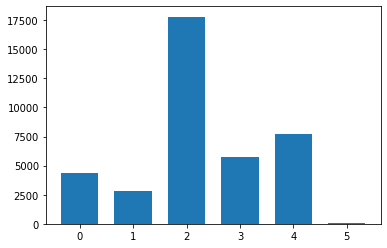

In [ ]:

fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'annotations/npy/remove_wake/'
signals_path = 'signals/npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

total_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list:
    label = np.load(path + filename)
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    
    signals = np.load(signals_path+signals_filename)
    
    
    #print('remove start index : %d / remove end index : %d'%(remove_start_index,remove_end_index))
    #print(np.bincount(label,minlength=6))
    if len(label) !=len(signals[0])//30//fs:
        print('file is fault!!!')
    for i in range(6):
        total_label[i] += np.bincount(label,minlength=6)[i]
        
print(total_label)

x = np.arange(len(total_label))

plt.bar(x,total_label,width=0.7)

In [ ]:
fs = 100                                # Sampling rate (512 Hz)
epoch_size = 30
#data = np.random.uniform(0, 100, 1024)  # 2 sec of data b/w 0.0-100.0

path =  'annotations/npy/remove_wake/'
signals_path = 'signals/npy/Fpz-Cz/remove_wake/'

annotations_npy_list = search_signals_npy(path)

print(annotations_npy_list)

random.shuffle(annotations_npy_list)

print(annotations_npy_list)

trainDataset_count = 30
testDataset_count = len(annotations_npy_list)-trainDataset_count

print(trainDataset_count)
print(testDataset_count)

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in annotations_npy_list[:trainDataset_count]:
    label = np.load(path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in annotations_npy_list[trainDataset_count:]:
    label = np.load(path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4141EU-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4001EC-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4162EC-Hypnogram.npy', 'SC4161EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4192EV-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4002EC-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4072EH-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4022EJ-Hypnogram.npy', 'SC4191EP-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4031EC-Hypnogram.npy', 'SC4061EC-H

In [ ]:
signals_path = 'signals/npy/Fpz-Cz/remove_wake/'

save_train_path = 'signals/npy//Fpz-Cz/remove_wake/train/'
save_test_path = 'signals/npy/Fpz-Cz/remove_wake/test/'

os.makedirs(save_train_path,exist_ok=True)
os.makedirs(save_test_path,exist_ok=True)

for filename in annotations_npy_list[:trainDataset_count]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_train_path+filename)
    

        
for filename in annotations_npy_list[trainDataset_count:]:
    signals_filename = search_correct_signals_npy(signals_path,filename)[0]
    shutil.copy(signals_path+signals_filename,save_test_path+filename)

In [ ]:
train_path =  'signals/npy/Fpz-Cz/remove_wake/train/'
test_path = 'signals/npy/Fpz-Cz/remove_wake/test/'
annotations_path = 'annotations/npy/remove_wake/'

train_list = search_signals_npy(train_path)
test_list = search_signals_npy(test_path)

print(train_list)
print(test_list)

train_label = np.zeros([6],dtype=int)
test_label = np.zeros([6],dtype=int)

for filename in train_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        train_label[i] += np.bincount(label,minlength=6)[i]

        
for filename in test_list:
    filename = search_correct_annotations_npy(annotations_path,filename)[0]
    label = np.load(annotations_path + filename)
    
    for i in range(6):
        test_label[i] += np.bincount(label,minlength=6)[i]
        
train_label = train_label / np.sum(train_label) * 100
test_label = test_label / np.sum(test_label) * 100
print(train_label)
print(test_label)

['SC4141EU-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4001EC-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4162EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4192EV-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4121EC-Hypnogram.npy', 'SC4002EC-Hypnogram.npy', 'SC4181EC-Hypnogram.npy', 'SC4112EC-Hypnogram.npy', 'SC4042EC-Hypnogram.npy', 'SC4071EC-Hypnogram.npy', 'SC4152EC-Hypnogram.npy', 'SC4032EP-Hypnogram.npy', 'SC4191EP-Hypnogram.npy', 'SC4111EC-Hypnogram.npy', 'SC4031EC-Hypnogram.npy', 'SC4061EC-Hypnogram.npy']
['SC4012EC-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4092EC-

In [ ]:
import numpy as np
import os
import time
import matplotlib.pylab as plt
from  torch.utils.data import Dataset
from torchvision import datasets, transforms
import sys
import random
import math
import warnings
import pandas as pd

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def data_preprocessing_torch(signals): # 하나의 데이터셋에 대한 data_preprocessing (using torch)
    signals = (signals - signals.mean(dim=1).unsqueeze(1))/signals.std(dim=1).unsqueeze(1)

    return signals

def data_preprocessing_oneToOne_torch(signals,min,max,max_value):
    signals_std = (signals + max_value) / (2*max_value)
    signals_scaled = signals_std * (max - min) + min
    return signals_scaled

def data_preprocessing_minmax_torch(signals,min,max):
    signals_std = (signals - signals.min(dim=1).unsqueeze(1)) / (
            signals.max(dim=1).unsqueeze(1) - signals.min(dim=1).unsqueeze(1))
    signals_scaled = signals_std * (max - min) + min
    return signals_scaled

def get_dataset_one_channel_norm_withoutCut(dirname,annotations_dir,data_path,use_noise=True,epsilon=0.5,noise_scale=2e-6,preprocessing=True,norm_methods='Standard'):
    # npy read!
    path = dirname + data_path
    signals = np.load(path)

    signals = torch.from_numpy(signals).float().to(device)

    if use_noise:
        if np.random.rand() < epsilon:
            # noise = np.random.normal(loc=0,scale=noise_scale,size=signals.shape)
            # signals = signals + noise
            noise = torch.normal(mean=0., std=noise_scale, size=signals.shape).to(device)
            signals = signals + noise

    if preprocessing:
        if norm_methods == 'Standard':
            signals = data_preprocessing_torch(signals)
        elif norm_methods == 'minmax':
            signals = data_preprocessing_minmax_torch(signals,0,1)
        elif norm_methods == 'oneToOne':
            signals = data_preprocessing_oneToOne_torch(signals,-1,1,1e-4)
    label = get_annotations(annotations_dir, data_path)
    return signals, label

# model conv layer weight init function
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:         # Conv weight init
        torch.nn.init.xavier_uniform_(m.weight.data)
        
def suffle_dataset_list(dataset_list): # 데이터 셔플
    random.shuffle(dataset_list)
    return dataset_list


# npy파일을 통해 label을 가져오는 함수
def get_annotations(label_dir,file_name):
    label_path = label_dir + file_name
    label = np.load(label_path)
    return label

def signals_expand_torch_one_channel(signals): # 2차원 데이터를 3차원으로 변환 (8,N) -> (batch,8,6000) 형태로
    signals = signals.expand(1,1,-1)
    #print(signals.shape)
    signals = signals.transpose(2, 1) # 차원 변경
    signals = signals.reshape(-1, 3000, 1) # 형태 변환
    signals = signals.transpose(2, 1) # 차원 변경
    return signals

In [ ]:
class DeepSleepNet_Classification(nn.Module):  # input channel = 8channel / output = 5
    def __init__(self,in_channel=1,out_channel=6,layer=[64,128,128,128],sample_rate = 100):
        super(DeepSleepNet_Classification, self).__init__()

        
        self.fc1 = nn.Linear(3000,1024)
        self.fc2 = nn.Linear(1024,1024)
        self.fc3 = nn.Linear(1024,512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, out_channel)
        

    def forward(self, input):
        # print("feature_extract_2d.shape : ", feature_extract_2d.shape)
        # 여기서 문제 발생 weight의 경우에는 [64 , 32 , 100] 이지만 input 이 2차원 [32, 750]이라 문제 발생!
        out = torch.flatten(input, 1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)

        return out

In [ ]:
model = DeepSleepNet_Classification(in_channel=1,out_channel=6)
summary(model.cuda(),(1,3000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]       3,073,024
            Linear-2                 [-1, 1024]       1,049,600
            Linear-3                  [-1, 512]         524,800
            Linear-4                  [-1, 256]         131,328
            Linear-5                    [-1, 6]           1,542
Total params: 4,780,294
Trainable params: 4,780,294
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 18.24
Estimated Total Size (MB): 18.27
----------------------------------------------------------------


In [ ]:
def search_npy_list(dirname):  # 매개변수 dir에서 모든 npy파일을 찾고 fold에 따른 dataset 나누기
    filenames = os.listdir(dirname)
    filenames = [file for _, file in enumerate(filenames) if file.endswith(".npy")]
    return filenames


In [ ]:
def train_model_withNoise_norm(save_filename,logging_filename,train_signal_dir, test_signal_dir,annotations_dir
                               ,epochs=2000,learning_rate=0.001,step_size=100,gamma=0.5,channel=0,
                               layer_filters=[64,128,256,512],first_conv=[200,40,100],optim='Adam',lf='CE',
                               epsilon=0.7,noise_scale=2e-6,min_value=-1e-4,max_value=1e-4,preprocessing=True,
                               norm_methods='Standard',use_noise=True,loss_type='softmax'):
    # Adam optimizer param
    b1 = 0.5
    b2 = 0.999

    beta = 0.001

    check_file = open(logging_filename, 'w')  # logging file

    print('Preproceesing  : ',preprocessing)
    print('min/max value : %f/%f'%(min_value,max_value))
    print('noise scale : ',noise_scale)
    print('loss function : ',lf)
    print('epsilon : ',epsilon)
    print('norm methods : ',norm_methods)

    print('logging file name : ', logging_filename)
    print('save file name : ', save_filename)
    print('layer filters : ',layer_filters)
    print('fisrt_conv info : ',first_conv)
    print('loss type : ',loss_type)
    print('training data oversampling noise : ',use_noise)
    best_accuracy = 0.
    best_epoch = 0

    train_dataset_list = search_npy_list(train_signal_dir)
    test_dataset_list = search_npy_list(test_signal_dir)

    train_dataset_len = len(train_dataset_list)
    test_dataset_len = len(test_dataset_list)

    print('train_dataset length : ', len(train_dataset_list))
    print(train_dataset_list)

    print('test_dataset length : ',test_dataset_len)
    print(test_dataset_list)


    model = DeepSleepNet_Classification()

    #model = resnet18_200hz(in_channel=1,layer_filters=layer_filters,first_conv=first_conv,use_batchnorm=True,num_classes=5)

    model.apply(weights_init) # weight init

    cuda = torch.cuda.is_available()

    if cuda:
        print('can use CUDA!!!')
        model = model.cuda()
    #summary(model,[1,6000])
    print('torch.cuda.device_count() : ', torch.cuda.device_count())
    if torch.cuda.device_count() > 1:
        print('Multi GPU Activation !!!')
        #model = nn.DataParallel(model)

    # loss funcition
    if lf == 'CE':
        loss_fn = nn.CrossEntropyLoss().to(device)
    elif lf == 'CEW':
        samples_per_cls = [27,15,41,5,11]
        no_of_classes = 5
        effective_num = 1.0 - np.power(beta,samples_per_cls)
        #print(effective_num)
        weights = (1.0 - beta) / np.array(effective_num)
        #print(weights)
        weights = weights / np.sum(weights) * no_of_classes
        weights = torch.tensor(weights).float()
        weights = weights.to(device)
        loss_fn = nn.CrossEntropyLoss(weight=weights).to(device)
    elif lf == 'FL':
        loss_fn = FocalLoss(gamma=2).to(device)
    elif lf == 'CBL':
        loss_fn = CB_loss(samples_per_cls=[27,15,41,5,11],no_of_classes=5,loss_type=loss_type,beta=0.9999,gamma=2.0)
    #loss_fn = FocalLoss(gamma=2).to(device)

    # optimizer ADAM (SGD의 경우에는 정상적으로 학습이 진행되지 않았음)
    if optim == 'Adam':
        print('Optimizer : Adam')
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(b1, b2))
    elif optim == 'RMS':
        print('Optimizer : RMSprop')
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optim == 'SGD':
        print('Optimizer : SGD')
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', factor=gamma, patience=10,
                                                           min_lr=1e-6)
    #stride = 40 일 때, batch_size = 20이면 16GB정도의 메모리 사용
    batch_size = 5
    norm_square = 2

    train_batch_size = math.ceil(train_dataset_len / batch_size)
    print('train_batch_size : ',train_batch_size)

    test_batch_size = test_dataset_len

    best_accuracy = 0.
    stop_count = 0
    for epoch in range(epochs):
        train_dataset = suffle_dataset_list(train_dataset_list) # 매 epoch마다 train_dataset shuffle !
        count = 0  # check batch
        train_total_loss = 0.0
        train_total_count = 0
        train_total_data = 0

        val_total_loss = 0.0
        val_total_count = 0
        val_total_data = 0

        test_total_loss = 0.0
        test_total_count = 0
        test_total_data = 0

        start_time = time.time()
        model.train()

        output_str = 'current_lr : %f\n'%(optimizer.state_dict()['param_groups'][0]['lr'])
        sys.stdout.write(output_str)
        check_file.write(output_str)
        for index, file_name in enumerate(train_dataset):
            #print('index : ',index)
            if index % batch_size == 0:
                batch_signal, batch_label = get_dataset_one_channel_norm_withoutCut(train_signal_dir,annotations_dir,file_name,
                                                                         use_noise=use_noise,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)
            else:
                new_signal, new_label = get_dataset_one_channel_norm_withoutCut(train_signal_dir,annotations_dir,file_name,
                                                                         use_noise=use_noise,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)

                batch_signal = torch.cat((batch_signal, new_signal),dim=1)
                batch_label = np.concatenate((batch_label, new_label))
            count += 1
            if count == batch_size or index == len(train_dataset) - 1:  # batch 학습 시작!
                batch_signal = signals_expand_torch_one_channel(batch_signal)
                #batch_signal = signals_expand_torch_one_channel(batch_signal)
                # batch_signal = torch.from_numpy(batch_signal).float().to(device)
                batch_label = torch.from_numpy(batch_label).long().to(device)
                optimizer.zero_grad()
                # print(batch_signal.shape)
                # print(batch_signal)
                pred = model(batch_signal)
                norm = 0

                for parameter in model.parameters():
                    norm += torch.norm(parameter, p=norm_square)

                loss = loss_fn(pred, batch_label) + beta * norm
                #print('loss : ',loss.item())
                # loss = loss_fn(pred, batch_label)
                # acc
                _, predict = torch.max(pred, 1)
                check_count = (predict == batch_label).sum().item()

                train_total_loss += loss.item()

                train_total_count += check_count
                train_total_data += len(batch_signal)
                loss.backward()
                optimizer.step()

                del (batch_signal)
                del (batch_label)
                del (loss)
                del (pred)
                torch.cuda.empty_cache()
                count = 0

        train_total_loss /= train_batch_size
        train_accuracy = train_total_count / train_total_data * 100

        output_str = 'train dataset : %d/%d epochs spend time : %.4f sec / total_loss : %.4f correct : %d/%d -> %.4f%%\n' \
                     % (epoch + 1, epochs, time.time() - start_time, train_total_loss,
                        train_total_count, train_total_data, train_accuracy)
        sys.stdout.write(output_str)
        check_file.write(output_str)

    

        #check test dataset
        start_time = time.time()
        for file_name in test_dataset_list:
            batch_signal, batch_label = get_dataset_one_channel_norm_withoutCut(test_signal_dir,annotations_dir,file_name,
                                                                         use_noise=False,epsilon=epsilon,noise_scale=noise_scale,
                                                                         preprocessing=preprocessing,norm_methods=norm_methods)

            batch_signal = signals_expand_torch_one_channel(batch_signal)

            batch_label = torch.from_numpy(batch_label).long().to(device)

            with torch.no_grad():
                pred = model(batch_signal)

                loss = loss_fn(pred, batch_label)

                # acc
                _, predict = torch.max(pred, 1)
                check_count = (predict == batch_label).sum().item()

                test_total_loss += loss.item()
                test_total_count += check_count
                test_total_data += len(batch_signal)

                # 사용하지 않는 변수 제거
                del (batch_signal)
                del (batch_label)
                del (loss)
                del (pred)
                torch.cuda.empty_cache()
        test_total_loss /= test_batch_size
        test_accuracy = test_total_count / test_total_data * 100



        output_str = 'test dataset : %d/%d epochs spend time : %.4f sec  / total_loss : %.4f correct : %d/%d -> %.4f%%\n' \
                     % (epoch + 1, epochs, time.time() - start_time, test_total_loss,
                        test_total_count, test_total_data, test_accuracy)
        sys.stdout.write(output_str)
        check_file.write(output_str)

        scheduler.step(float(test_total_loss))
        #scheduler.step()

        if epoch == 0:
            best_accuracy = test_accuracy
            best_epoch = epoch
            save_file = save_filename
            #save_file = save_path + 'best_SleepEEGNet_CNN_channel%d.pth'%channel
            torch.save(model.state_dict(),save_file)
            stop_count = 0
        else:
            if best_accuracy < test_accuracy:
                best_accuracy = test_accuracy
                best_epoch = epoch
                save_file = save_filename
                torch.save(model.state_dict(), save_file)
                stop_count = 0
            else:
                stop_count += 1
        if stop_count > 30:
            print('Early Stopping')
            break

        output_str = 'best epoch : %d/%d / val accuracy : %f%%\n' \
                     % (best_epoch+1, epochs, best_accuracy)
        sys.stdout.write(output_str)
        print('=' * 30)


    output_str = 'best epoch : %d/%d / accuracy : %f%%\n' \
                 % (best_epoch+1, epochs, best_accuracy)
    sys.stdout.write(output_str)
    check_file.write(output_str)
    print('=' * 30)

    check_file.close()

In [ ]:
save_filename = './train.pth'
logging_filename = './logging.txt'
train_signal_dir = 'signals/npy/Fpz-Cz/remove_wake/train/'
test_signal_dir = 'signals/npy/Fpz-Cz/remove_wake/test/'
annotations_dir = 'annotations/npy/remove_wake/'
train_model_withNoise_norm(save_filename,logging_filename,train_signal_dir, 
                           test_signal_dir,annotations_dir,
                           epochs=2000,learning_rate=0.001,step_size=100,gamma=0.5,channel=0,
                           layer_filters=[64,128,256,512],first_conv=[200,40,100],
                           optim='Adam',lf='CE',epsilon=0,noise_scale=0,
                           min_value=-0,max_value=0,preprocessing=True,
                           norm_methods='Standard',use_noise=False,loss_type='softmax')

Preproceesing  :  True
min/max value : 0.000000/0.000000
noise scale :  0
loss function :  CE
epsilon :  0
norm methods :  Standard
logging file name :  ./logging.txt
save file name :  ./train.pth
layer filters :  [64, 128, 256, 512]
fisrt_conv info :  [200, 40, 100]
loss type :  softmax
training data oversampling noise :  False
train_dataset length :  36
['SC4141EU-Hypnogram.npy', 'SC4091EC-Hypnogram.npy', 'SC4081EC-Hypnogram.npy', 'SC4101EC-Hypnogram.npy', 'SC4001EC-Hypnogram.npy', 'SC4012EC-Hypnogram.npy', 'SC4082EP-Hypnogram.npy', 'SC4102EC-Hypnogram.npy', 'SC4021EH-Hypnogram.npy', 'SC4092EC-Hypnogram.npy', 'SC4062EC-Hypnogram.npy', 'SC4041EC-Hypnogram.npy', 'SC4162EC-Hypnogram.npy', 'SC4182EC-Hypnogram.npy', 'SC4151EC-Hypnogram.npy', 'SC4131EC-Hypnogram.npy', 'SC4052EC-Hypnogram.npy', 'SC4051EC-Hypnogram.npy', 'SC4142EU-Hypnogram.npy', 'SC4172EC-Hypnogram.npy', 'SC4122EV-Hypnogram.npy', 'SC4192EV-Hypnogram.npy', 'SC4171EU-Hypnogram.npy', 'SC4011EH-Hypnogram.npy', 'SC4121EC-Hypnogr